<a href="https://colab.research.google.com/github/nandakishore2696/Hugging_Face_Projects/blob/main/VIT_Age_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from PIL import Image
from io import BytesIO

from transformers import ViTFeatureExtractor, ViTForImageClassification

# Init model, transforms
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [19]:
# Get example image from official fairface repo + read it in as an image
r = requests.get('https://github.com/dchen236/FairFace/blob/master/detected_faces/race_Asian_face0.jpg?raw=true')
im = Image.open(BytesIO(r.content))

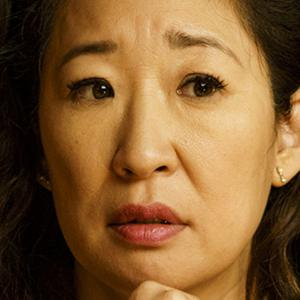

In [20]:
display(im)

In [21]:
# Transform our image and pass it through the model
inputs = transforms(im, return_tensors='pt')
output = model(**inputs)


In [22]:
# Predicted Class probabilities
proba = output.logits.softmax(1)
proba

tensor([[1.5177e-05, 1.0487e-05, 2.5665e-04, 3.3254e-02, 5.1752e-01, 4.0242e-01,
         4.4780e-02, 1.7092e-03, 3.0378e-05]], grad_fn=<SoftmaxBackward0>)

In [23]:
# Predicted Classes
preds = proba.argmax(1)
preds

tensor([4])

In [ ]:
# 0 - 10
# 11 - 20
# 21 - 30
# 31 - 40
# 41 - 50
# 51 - 60